In [1]:
import copy
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt



In [2]:
############确定要画的图的横纵坐标##########（最终确定横坐标为fold-change，纵坐标为log2(min(activity1,activity2))）
# 设置工作路径和读入文件
os.chdir(r'E:\文件\大学课程\大四上\毕业设计\数据分析\ninthweek\画图')
df=pd.read_excel('all-peptides-pairs.xlsx',header=0)


# 计算有无修饰只差，并取log2和绝对值
# df['abs(log2(subtract))']=abs(np.log2(df['abs(none-modification)']))
# df['abs(log10(subtract))']=abs(np.log10(df['abs(none-modification)']))


# 取有无修饰中活性最强的数值即测算数值较小的，并对取得的数字进行log2标化
df['1/min(none&modification)']=0
for index, row in df.iterrows():
    df.loc[index,'1/min(none&modification)']=1/min(row['activity1'],row['activity2'])
# df['abs(log2(1/min(none&modification)))']=abs(np.log2(df['1/min(none&modification)']))  #取绝对值是不对的，会把原本活性小的数值变成活性大的
df['log2(1/min(none&modification))']=np.log2(df['1/min(none&modification)'])

df['1/none']=1/df['activity1']
# 对于无穷大或无穷小的数值将其定为0
df=df.replace([np.inf,np.NINF],0)

# 设置分组信息，上调、不变、下调
df['sig']='normal'
df.loc[df['fold-change']>0,'sig']='up'
df.loc[df['fold-change']<0,'sig']='down'
# df.to_excel('画图all-new-pairs.xlsx',index=False)

In [3]:
df

,sequence,target,stick_terminal,communal-modification,measure,unit,modification1,modification2,activity1,activity2,fold-change,abs(none-modification),1/min(none&modification),log2(1/min(none&modification)),1/none,sig
0,ALWKTLLKKVLKA,Staphylococcus aureus B38302,n_terminal,none,MIC,uM,none,AMD,3.0,9.0,-1.584963,6.0,0.333333,-1.584963,0.333333,down
1,ALWKTLLKKVLKA,Escherichia coli U16318,n_terminal,none,MIC,uM,none,AMD,6.0,4.5,0.415037,1.5,0.222222,-2.169925,0.166667,up
2,FKRIVQRIKDFLR,Pseudomonas aeruginosa PAO1,n_terminal,none,MIC,uM,none,AMD,16.0,16.0,0.000000,0.0,0.062500,-4.000000,0.062500,normal
3,FKRIVQRIKDFLR,Escherichia coli ATCC 25922,n_terminal,none,MIC,uM,none,AMD,16.0,16.0,0.000000,0.0,0.062500,-4.000000,0.062500,normal
4,FKRIVQRIKDFLR,Staphylococcus aureus ATCC 29213,n_terminal,none,MIC,uM,none,AMD,16.0,16.0,0.000000,0.0,0.062500,-4.000000,0.062500,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C12,1.3,0.7,0.893085,0.6,1.428571,0.514573,0.769231,up
5795,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C14,1.3,1.2,0.115477,0.1,0.833333,-0.263034,0.769231,up
5796,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C16,1.3,1.7,-0.387023,0.4,0.769231,-0.378512,0.769231,down
5797,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C18,1.3,1.8,-0.469485,0.5,0.769231,-0.378512,0.769231,down


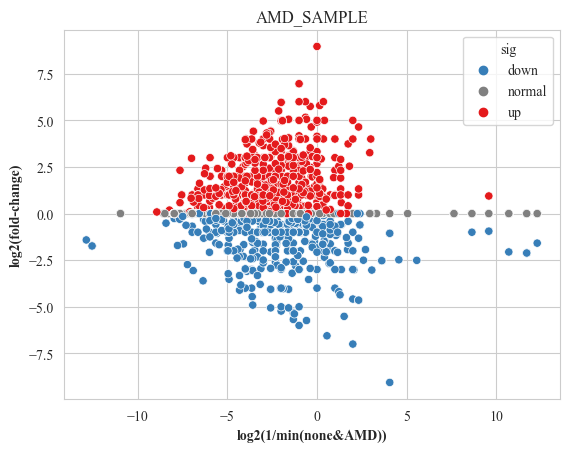

In [26]:
#筛选每一种分类绘图
# file_name,change_ter, stick_ter,stick_modification,measure,unit
cycle=[['n_terminal','none','AMD'],['n_terminal','ACT','AMD'],['c_terminal','none','ACT'],['c_terminal','AMD','ACT']]

def AMDPLOT(df,stick_ter,communal_modification,modification,yal):
    filter=df[(df['stick_terminal']==stick_ter) & (df['communal-modification']==communal_modification) & (df['modification2']==modification)]
    # plt.figure(figsize=(10,10))
    ax = sns.scatterplot(y="fold-change", x=yal,
                      hue='sig',
                      hue_order = ('down','normal','up'),
                      palette=("#377EB8","grey","#E41A1C"),
                      data=filter)
    # 设置字体为 Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'
    # ####设置x,y刻度线####
    # plt.axis('equal')  #设置横纵坐标的比例尺相同
    # # plt.rcParams["legend.markerscale"] = 0.1
    # yticks=np.arange(-15,15,0.5)
    # xticks=np.arange(-15,15,0.5)
    # ax.set_yticks(yticks)
    # ax.set_yticklabels(yticks,fontsize=5)
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticks,fontsize=5,rotation=90)
    #
    # ####添加趋势线######
    # x = np.linspace(-6.56,3, 100)  #生成100个点，点的范围是0,10
    # y1 = 1 * x +6.56
    # y2 = 1 * x + 8
    # y3 = 1 * x + 6.7
    #
    # # plt.plot(x, y1, color='green')
    # plt.plot(x, y1, color='yellow', label='y1=x-6.5')
    # # plt.plot(x, y2, color='green', label='y2=x-6')
    # # plt.plot(x, y3, color='green', label='y3=y3-7')
    #
    # x4 = np.linspace(-8,3, 100)
    # y4=-0.78 * x4 - 6
    # plt.plot(x4, y4, color='green', label='y3=y3-7')
    ###设置坐标轴标题和图表标题#####
    ylabel=yal.replace('modification',modification)
    # ylabel=ylabel.replace('\\','除')
    ax.set_xlabel(ylabel,fontweight='bold')
    ax.set_ylabel('log2(fold-change)',fontweight='bold')
    new_y=yal.replace('/','除')
    # ax.axhline(y=-7, color='green', linestyle='--')
    titles='&'.join([stick_ter,communal_modification,modification,new_y])
    plt.title(modification+'_SAMPLE')
    titles=titles+'.png'
    scatter_fig=ax.get_figure()
    scatter_fig.savefig(titles,dpi=800)
AMDPLOT(df,'n_terminal','none','AMD','log2(1/min(none&modification))')      #1/min(none&modification),abs(log2(1/min(none&modification))),


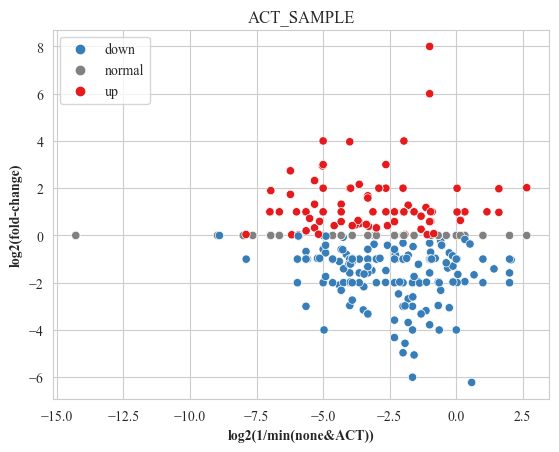

In [27]:
def ACTPLOT(df,stick_ter,communal_modification,modification,yal):
    filter=df[(df['stick_terminal']==stick_ter) & (df['communal-modification']==communal_modification) & (df['modification2']==modification)]
    # plt.figure(figsize=(10,10))
    ax = sns.scatterplot(y="fold-change", x=yal,
                      hue='sig',
                      hue_order = ('down','normal','up'),
                      palette=("#377EB8","grey","#E41A1C"),
                      data=filter)
    # 设置字体为 Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'
    ####设置x,y刻度线####
    # plt.axis('equal')  #设置横纵坐标的比例尺相同
    # # plt.rcParams["legend.markerscale"] = 0.1
    # yticks=np.arange(-15,15,0.5)
    # xticks=np.arange(-15,15,0.5)
    # ax.set_yticks(yticks)
    # ax.set_yticklabels(yticks,fontsize=5)
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticks,fontsize=5,rotation=90)

    ####添加趋势线######
    # x = np.linspace(-8,3, 100)  #生成100个点，点的范围是0,10
    # y1 = 1 * x +6.56
    # y2 = 1 * x + 8
    # y3 = 1 * x + 6.7
    # # plt.plot(x, y1, color='green')
    # plt.plot(x, y1, color='yellow', label='y1=x-6.5')
    # plt.plot(x, y2, color='green', label='y2=x-6')
    # plt.plot(x, y3, color='green', label='y3=y3-7')
    ###设置坐标轴标题和图表标题#####
    plt.title(modification+'_SAMPLE')
    ylabel=yal.replace('modification',modification)
    plt.legend(loc='upper left')
    # ylabel=ylabel.replace('\\','除')
    ax.set_xlabel(ylabel,fontweight='bold')
    ax.set_ylabel('log2(fold-change)',fontweight='bold')
    new_y=yal.replace('/','除')
    # ax.axhline(y=-7, color='green', linestyle='--')
    titles='&'.join([stick_ter,communal_modification,modification,new_y])
    titles=titles+'.png'
    scatter_fig=ax.get_figure()
    scatter_fig.savefig(titles,dpi=800)
ACTPLOT(df,'c_terminal','AMD','ACT','log2(1/min(none&modification))')

In [6]:
# 筛选出所有的脂肪链修饰归为一类

ccdf1=df[(df['modification2'].isin(['C3', 'C4', 'C5','C6','C7','C8','C10','C11','C12','C13','C14','C15','C16','C18'])) & (df['communal-modification']=='none') & (df['stick_terminal']=='c_terminal')].copy()

ccdf2=df[(df['modification2'].isin(['C3', 'C4', 'C5','C6','C7','C8','C10','C11','C12','C13','C14','C15','C16','C18'])) & (df['communal-modification']=='AMD') & (df['stick_terminal']=='c_terminal')].copy()

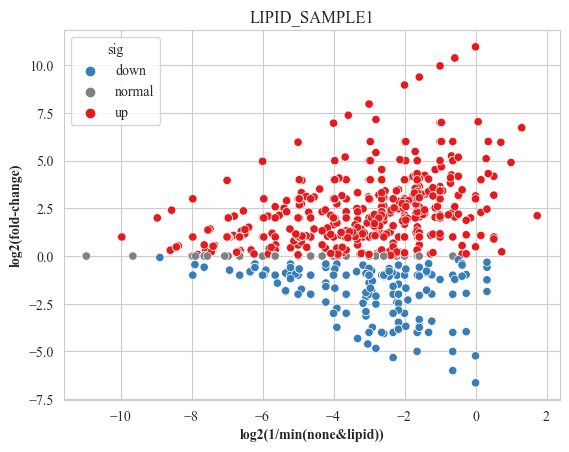

In [36]:



def LIPIDPLOT1(df,stick_ter,communal_modification,y):
    # plt.figure(figsize=(10,10))
    ax = sns.scatterplot(y="fold-change", x=y,
                      hue='sig',
                      hue_order = ('down','normal','up'),
                      palette=("#377EB8","grey","#E41A1C"),
                      data=df)
    # 设置字体为 Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'
    # ####设置x,y刻度线####
    # plt.axis('equal')  #设置横纵坐标的比例尺相同
    # # plt.rcParams["legend.markerscale"] = 0.1
    # yticks=np.arange(-15,15,0.5)
    # xticks=np.arange(-15,15,0.5)
    # ax.set_yticks(yticks)
    # ax.set_yticklabels(yticks,fontsize=5)
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticks,fontsize=5,rotation=90)
    #
    # ####添加趋势线######
    # x = np.linspace(-12,1, 100)  #生成100个点，点的范围是0,10
    # y1 = 1 * x +11
    # y2 = 1 * x + 9
    # y3 = 1 * x + 6.7
    # y4=-0.8*x-6
    # # plt.plot(x, y1, color='green')
    # plt.plot(x, y1, color='yellow', label='y1=x+6.5')
    # plt.plot(x, y2, color='green', label='y2=x-6')
    # # plt.plot(x, y3, color='green', label='y3=y3-7')
    # plt.plot(x, y4, color='yellow', label='y1=x+6.5')
    # yticks=np.arange(-7.5,2,0.5)
    # ax.set_yticks(yticks)
    plt.title('LIPID_SAMPLE1')
    ylabel=y.replace('modification','lipid')
    ax.set_xlabel(ylabel,fontweight='bold')
    new_y=y.replace('/','除')
    ax.set_ylabel('log2(fold-change)',fontweight='bold')
    titles='&'.join([stick_ter,communal_modification,'lipid',new_y])
    titles=titles+'.png'
    scatter_fig=ax.get_figure()
    scatter_fig.savefig(titles,dpi=800)

LIPIDPLOT1(ccdf2,'c_terminal','AMD','log2(1/min(none&modification))')

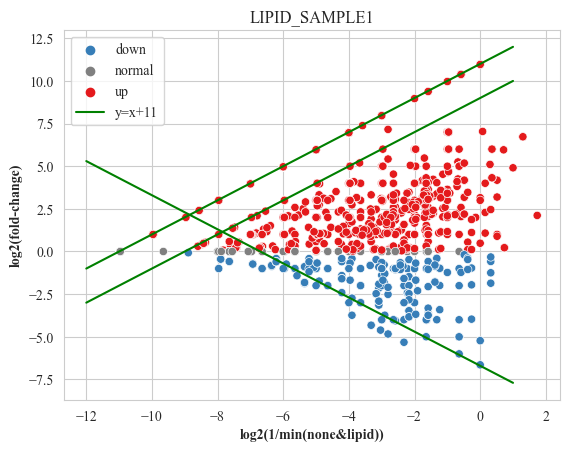

In [44]:
def LIPIDPLOT1(df,stick_ter,communal_modification,y):
    # plt.figure(figsize=(10,10))
    ax = sns.scatterplot(y="fold-change", x=y,
                      hue='sig',
                      hue_order = ('down','normal','up'),
                      palette=("#377EB8","grey","#E41A1C"),
                      data=df)
    # 设置字体为 Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'
    # ####设置x,y刻度线####
    # plt.axis('equal')  #设置横纵坐标的比例尺相同
    # # plt.rcParams["legend.markerscale"] = 0.1
    # yticks=np.arange(-15,15,0.5)
    # xticks=np.arange(-15,15,0.5)
    # ax.set_yticks(yticks)
    # ax.set_yticklabels(yticks,fontsize=5)
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticks,fontsize=5,rotation=90)
    #
    # ####添加趋势线######
    x = np.linspace(-12,1, 100)  #生成100个点，点的范围是0,10
    y1 = 1 * x +11
    y2 = 1 * x + 9
    y3 = -1 * x -6.7
    # y4=-0.8*x-6
    plt.plot(x, y1, color='green',label='y=x+11')
    plt.legend(loc='upper left')
    # plt.plot(x, y1, color='yellow', label='y1=x+6.5')
    plt.plot(x, y2, color='green', label='y2=x-6')
    plt.plot(x, y3, color='green', label='y3=y3-7')
    # plt.plot(x, y4, color='yellow', label='y1=x+6.5')
    # yticks=np.arange(-7.5,2,0.5)
    # ax.set_yticks(yticks)
    plt.title('LIPID_SAMPLE1')
    ylabel=y.replace('modification','lipid')
    ax.set_xlabel(ylabel,fontweight='bold')
    new_y=y.replace('/','除')
    ax.set_ylabel('log2(fold-change)',fontweight='bold')
    titles='&'.join([stick_ter,communal_modification,'lipid',new_y])
    titles=titles+'.png'
    scatter_fig=ax.get_figure()
    # scatter_fig.savefig('趋势线'+titles,dpi=800)

LIPIDPLOT1(ccdf2,'c_terminal','AMD','log2(1/min(none&modification))')

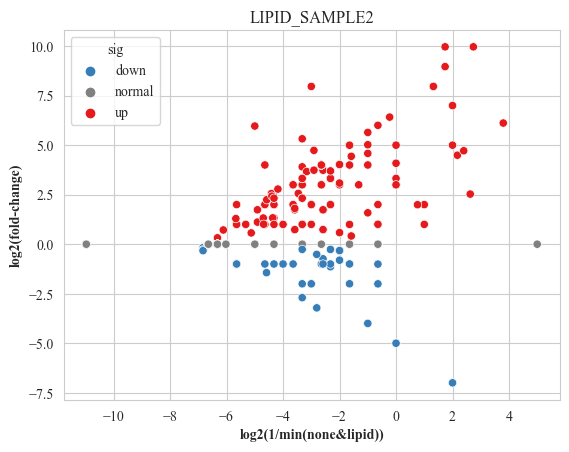

In [37]:



def LIPIDPLOT2(df,stick_ter,communal_modification,y):
    # plt.figure(figsize=(10,10))
    ax = sns.scatterplot(y="fold-change", x=y,
                      hue='sig',
                      hue_order = ('down','normal','up'),
                      palette=("#377EB8","grey","#E41A1C"),
                      data=df)
    # 设置字体为 Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'
    ####设置x,y刻度线####
    # plt.axis('equal')  #设置横纵坐标的比例尺相同
    # # plt.rcParams["legend.markerscale"] = 0.1
    # yticks=np.arange(-15,15,0.5)
    # xticks=np.arange(-15,15,0.5)
    # ax.set_yticks(yticks)
    # ax.set_yticklabels(yticks,fontsize=5)
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticks,fontsize=5,rotation=90)
    #
    # ####添加趋势线######
    # x = np.linspace(-8,2, 100)  #生成100个点，点的范围是0,10
    # y1 = 1 * x +6.8
    # y2 = 1 * x + 9
    # y3 = 1 * x + 6.7
    # y4=-0.7*x-5
    # # plt.plot(x, y1, color='green')
    # plt.plot(x, y1, color='yellow', label='y1=x+6.5')
    # # plt.plot(x, y2, color='green', label='y2=x-6')
    # # plt.plot(x, y3, color='green', label='y3=y3-7')
    # plt.plot(x, y4, color='yellow', label='y1=x+6.5')
    # yticks=np.arange(-7.5,2,0.5)
    # ax.set_yticks(yticks)
    ylabel=y.replace('modification','lipid')
    ax.set_xlabel(ylabel,fontweight='bold')
    new_y=y.replace('/','除')
    ax.set_ylabel('log2(fold-change)',fontweight='bold')
    titles='&'.join([stick_ter,communal_modification,'lipid',new_y])
    titles=titles+'.png'
    plt.title('LIPID_SAMPLE2')
    scatter_fig=ax.get_figure()
    scatter_fig.savefig(titles,dpi=800)
LIPIDPLOT2(ccdf1,'c_terminal','none','log2(1/min(none&modification))')

In [9]:
# 针对脂肪链修饰绘制一个分组的火山图，就是曼哈顿图和火山图的结合，同时给明显活性上升的点标注出序列和target
# 横坐标是差值，纵坐标是fold-change，对每一类进行类推，每一类的差值在前一类的基础上加一
lipids=['C3', 'C4', 'C5','C6','C7','C8','C10','C11','C12','C13','C14','C15','C16','C18']
ccdf3=ccdf2.copy()
ccdf3['xxx']=ccdf3['log2(1/min(none&modification))'].copy()
index=0
maxslist=[]
maxs=0
for i, lipid in enumerate(lipids):
    mdf=ccdf3[(ccdf3['modification2']==lipid)]
    # print(mdf)
    if index==0:
        maxs=max(list(mdf['log2(1/min(none&modification))']))
        maxslist.append(maxs)
        index+=1
    else:
        if min(list(mdf['log2(1/min(none&modification))'])) < 0:
            maxs+=(max(list(mdf['log2(1/min(none&modification))']))-min(list(mdf['log2(1/min(none&modification))'])))
            maxslist.append(maxs)
            ccdf3.loc[ccdf3['modification2']==lipid,'xxx']=ccdf3['xxx']+maxslist[index]
            index+=1
        else:
            maxs+=(max(list(mdf['log2(1/min(none&modification))'])))
            maxslist.append(maxs)
            ccdf3.loc[ccdf3['modification2']==lipid,'xxx']=ccdf3['xxx']+maxslist[index]
            index+=1

index=0
maxslist=[0]
maxs=0
for i, lipid in enumerate(lipids):
    mdf=ccdf3[(ccdf3['modification2']==lipid)]
    if min(list(mdf['log2(1/min(none&modification))'])) < 0:
        maxs+=(max(list(mdf['log2(1/min(none&modification))']))-min(list(mdf['log2(1/min(none&modification))'])))
        maxslist.append(maxs)
        ccdf3.loc[ccdf3['modification2']==lipid,'xxx']=ccdf3['xxx']+maxslist[index-1]
        index+=1
    else:
        maxs+=(max(list(mdf['log2(1/min(none&modification))'])))
        maxslist.append(maxs)
        ccdf3.loc[ccdf3['modification2']==lipid,'xxx']=ccdf3['xxx']+maxslist[index-1]
        index+=1

In [10]:
ccdf3
# maxslist

,sequence,target,stick_terminal,communal-modification,measure,unit,modification1,modification2,activity1,activity2,fold-change,abs(none-modification),1/min(none&modification),log2(1/min(none&modification)),1/none,sig,xxx
3749,KVvvKWVvKvVK,Staphylococcus aureus ATCC 6538P,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.010000,-6.643856,0.010000,normal,187.586998
3750,KVvvKWVvKvVK,Bacillus subtilis ATCC 6051,c_terminal,AMD,MIC,uM,none,C16,60.0,100.0,-0.736966,40.0,0.016667,-5.906891,0.016667,down,188.323964
3751,KVvvKWVvKvVK,Pseudomonas aeruginosa ATCC 27853,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.010000,-6.643856,0.010000,normal,187.586998
3752,KVvvKWVvKvVK,Acinetobacter baumannii ATCC 19606,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.010000,-6.643856,0.010000,normal,187.586998
3753,KVvvKWVvKvVK,Escherichia coli ATCC 25922,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.010000,-6.643856,0.010000,normal,187.586998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C12,1.3,0.7,0.893085,0.6,1.428571,0.514573,0.769231,up,132.910040
5795,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C14,1.3,1.2,0.115477,0.1,0.833333,-0.263034,0.769231,up,165.755255
5796,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C16,1.3,1.7,-0.387023,0.4,0.769231,-0.378512,0.769231,down,193.852343
5797,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C18,1.3,1.8,-0.469485,0.5,0.769231,-0.378512,0.769231,down,210.439615


In [11]:
# 创建一个获取所有最大横坐标的列表
get_maxlist=[]
for i, lipid in enumerate(lipids):
    mdf=ccdf3[(ccdf3['modification2']==lipid)]
    get_maxlist.append(max(list(mdf['xxx'])))

C:\Users\lanliu\AppData\Local\Temp\ipykernel_10736\12580828.py:25: RuntimeWarning: invalid value encountered in log2
  y1 = 1.2*(np.log2(x1))+1
C:\Users\lanliu\AppData\Local\Temp\ipykernel_10736\12580828.py:31: RuntimeWarning: invalid value encountered in log2
  y2 = -0.7*(np.log2(x1))-2


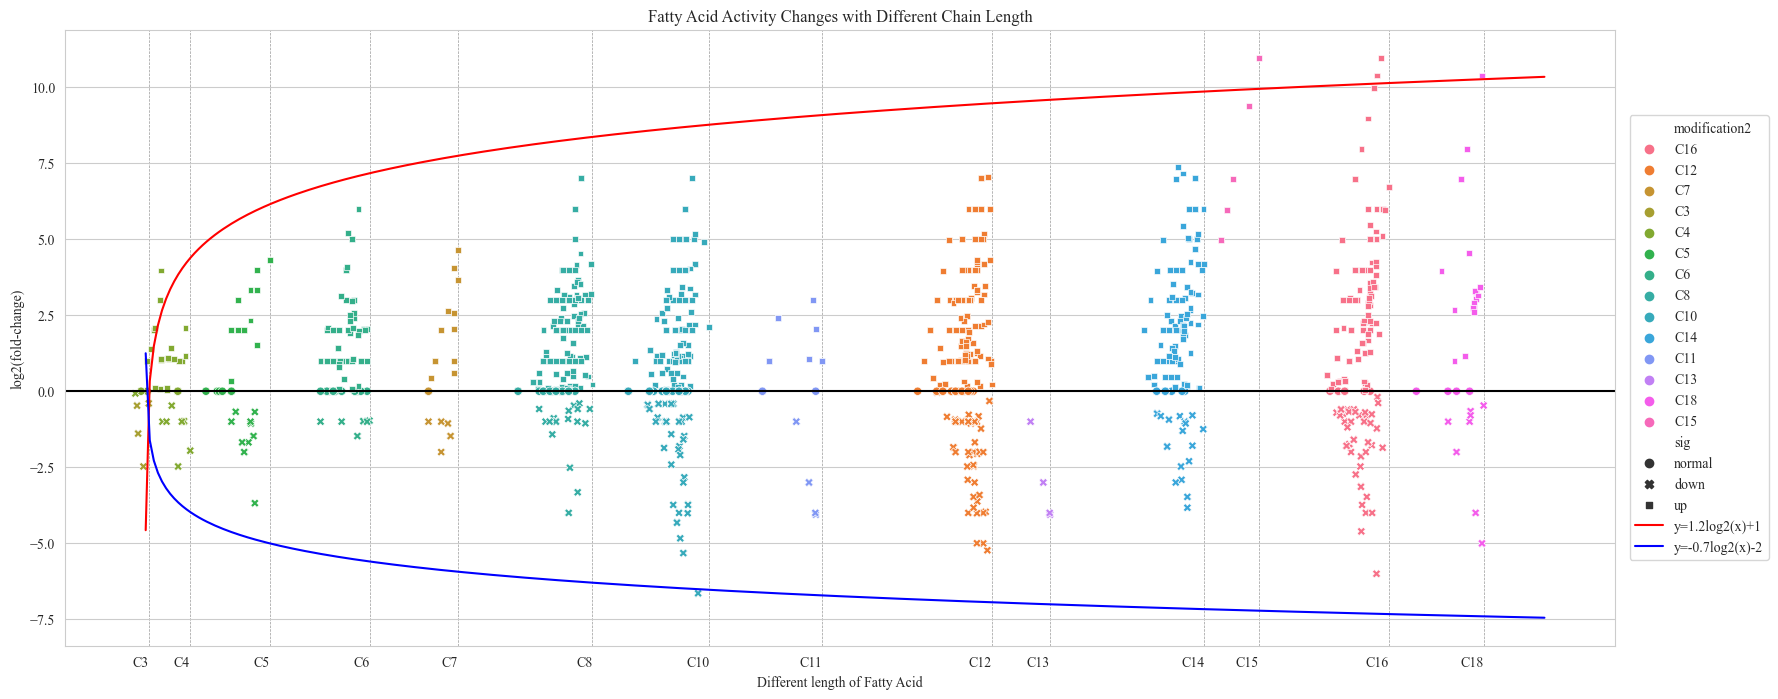

In [48]:

# plt.rcParams['font.family'] = ['SimHei']   #设置字体使中文字能显示
# plt.rcParams['font.sans-serif']= ['SimSun']
# 设置字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(20, 8))
plt.grid(axis='x',color='grey', linestyle='--', linewidth=0.5, alpha=0.8)
ax = sns.scatterplot(x="xxx", y="fold-change",
                  hue='modification2',
                  style='sig',
                  data=ccdf3)
plt.rcParams['font.sans-serif']= ['Times New Roman']
plt.ylabel('log2(fold-change)')

plt.xticks(get_maxlist,lipids,fontsize=10,ha='right')
ax.set_xlabel('Different length of Fatty Acid')
ax.set_title('Fatty Acid Activity Changes with Different Chain Length')
plt.axhline(y=0, color='black', linestyle='-')
# plt.axhline(y=-5, color='g', linestyle='--')
# plt.axhline(y=5, color='g', linestyle='--')

#####添加对数线######
# 生成x轴数据
x1 = np.linspace(-100, 220, 500)
# 计算log2(x)的值
y1 = 1.2*(np.log2(x1))+1
# 绘制曲线
plt.plot(x1, y1,color='red',label='y=1.2log2(x)+1')

x2 = np.linspace(-100, 220, 500)
# 计算log2(x)的值
y2 = -0.7*(np.log2(x1))-2
# 绘制曲线
plt.plot(x2, y2,color='blue',label='y=-0.7log2(x)-2')

plt.legend(bbox_to_anchor=(1.005, 0.5), loc='center left')

#####筛选高活性的点########
# ups=ccdf3[(ccdf3['fold-change']>5)].copy()
# ups=ups[ups['abs(log10(subtract))']>3]
# for index,row in ups.iterrows():
#     texts='&'.join([row['sequence'],row['target']])
#     x=row['xxx']
#     y=row['fold-change']
#     ax.annotate(texts,xy=(x,y),xytext=(x+0.1,y+0.1),color='red',fontsize=5)
#
# downs=ccdf3[(ccdf3['fold-change']<-4)].copy()
# downs=downs[downs['abs(log10(subtract))']>2]
# for index,row in downs.iterrows():
#     texts='&'.join([row['sequence'],row['target']])
#     x=row['xxx']
#     y=row['fold-change']
#     ax.annotate(texts,xy=(x,y),xytext=(x+0.1,y+0.1),color='blue',fontsize=5)

plt.savefig('lipid-分组(800dpi).png',dpi=800)

# ax.set_ylabel('abs(none-lipid)',fontweight='bold')
# ax.set_xlabel('FoldChange',fontweight='bold')
# titles='&'.join([stick_ter,communal_modification,'lipid'])
# titles=titles+'.png'
# scatter_fig=ax.get_figure()
# scatter_fig.savefig(titles,dpi=1300)

In [13]:
# len(maxslist)
print(maxslist)
print(lipids)

[0, 1.8479969065549504, 10.477505317369708, 20.488804261284166, 28.19155414011246, 32.83541032988718, 44.538160208715475, 57.24091008754377, 66.6217318714847, 78.324481750313, 81.38337543936656, 90.86373289685841, 96.86373289685841, 106.53704632444791, 117.12431898585628]
['C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C18']
